In [1]:
import sys
sys.path.append("/home/bl9/gempy/")
import gempy as gp

%matplotlib inline
import pymc
import numpy as np
import math

#import geobayes_simple as gs
from IPython.core.display import Image

from pymc.Matplot import plot
from pymc import graph

from IPython.core.pylabtools import figsize
figsize(15, 6)

#import seaborn
#seaborn.set_context(font_scale=2)
#seaborn.set_style("white")

import scipy.optimize as sop
import scipy.stats as stats
from scipy.signal import argrelextrema

import matplotlib.mlab as mlab
from matplotlib import pyplot as plt

import importlib

import copy

from operator import itemgetter

from mpl_toolkits.mplot3d import Axes3D

/home/bl9/gempy/gempy/Visualization.py:15: UserWarning: Vtk package is not installed. No vtk visualization available.
  warnings.warn('Vtk package is not installed. No vtk visualization available.')


In [90]:
#import vtk

In [91]:
#gp.plot_data_3D(geo_data)

In [2]:
# Importing the data from csv files and setting extent and resolution
geo_data = gp.create_data([0,2000,0,2000,-2000,0],[ 50,50,50],
                         path_f = "/home/bl9/gempy//input_data/FabLessPoints_Foliations.csv",
                         path_i = "/home/bl9/gempy//input_data/FabLessPoints_Points.csv")
geo_data.n_faults = 1

In [3]:
gp.set_series(geo_data, {"fault":'MainFault', 
                      "Rest":('Reservoir', 'Seal', 'NonReservoirDeep','SecondaryReservoir')},
                       order_series = ["fault",
                                       "Rest",
                                       ], verbose=0)

In [4]:
geo_data.set_formation_number(['MainFault', 'NonReservoirDeep', 'Reservoir', 'Seal',
                               'SecondaryReservoir'])

In [5]:
gp.data_to_pickle(geo_data, 'BasicFault')

In [6]:
# stdev for x,y,z interface coordinates
geo_data.interfaces['X_std'] = None
geo_data.interfaces['Y_std'] = None
geo_data.interfaces['Z_std'] = None
geo_data.interfaces['dist_type'] = "Normal" # should be initially None
geo_data.interfaces['X_dist'] = None
geo_data.interfaces['Y_dist'] = None
geo_data.interfaces['Z_dist'] = None

In [7]:
geo_data.interfaces.head()

X       Y       Z  formation series  order_series  formation number  \
0  1000.0  1000.0 -1000.0  MainFault  fault             1                 1   
1   800.0  1000.0 -1600.0  MainFault  fault             1                 1   
2  1200.0  1000.0  -400.0  MainFault  fault             1                 1   
3  1100.0  1000.0  -700.0  MainFault  fault             1                 1   
4   900.0  1000.0 -1300.0  MainFault  fault             1                 1   

   isFault X_std Y_std Z_std dist_type X_dist Y_dist Z_dist  
0     True  None  None  None    Normal   None   None   None  
1     True  None  None  None    Normal   None   None   None  
2     True  None  None  None    Normal   None   None   None  
3     True  None  None  None    Normal   None   None   None  
4     True  None  None  None    Normal   None   None   None

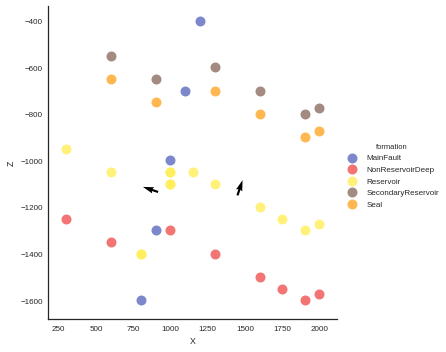

In [8]:
gp.plot_data(geo_data)

In [97]:
interp_data = gp.InterpolatorInput(geo_data, 
                                   u_grade = [3, 3],
                                   compile_theano=True)

[2, 2]


In [98]:
sol, pot = gp.compute_model(interp_data, get_potential_at_interfaces=True)
sol.shape

[3, 3]


(3, 125000)

In [99]:
res_surf, what_surf = gp.get_surfaces(potential_block=sol[1,:], interp_data = interp_data, n_formation = (interp_data.get_formation_number()['Reservoir']))

lith = sol[0,:]
fault = sol[2,:]

In [15]:
np.set_printoptions(threshold=10)
#(position res_surf[1,:])
#print(res_sorted)
#sol[0,:].reshape(50,50,50)

In [13]:
interp_data.get_formation_number()

{'DefaultBasement': 0,
 'MainFault': 1,
 'NonReservoirDeep': 2,
 'Reservoir': 3,
 'Seal': 4,
 'SecondaryReservoir': 5}

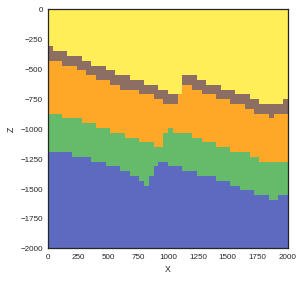

In [100]:
gp.plot_section(geo_data, sol[0,:], 25) #plot_data=True)

In [16]:
interp_data.geo_data_res.n_faults

1

In [128]:
interp_data.geo_data_res.interfaces

X         Y         Z           formation series  order_series  \
0   0.461638    0.5001    0.5001           MainFault  fault             1   
1   0.410356    0.5001  0.346254           MainFault  fault             1   
2   0.512921    0.5001  0.653946           MainFault  fault             1   
3   0.487279    0.5001  0.577023           MainFault  fault             1   
4   0.435997    0.5001  0.423177           MainFault  fault             1   
5   0.282151    0.5001  0.435997    NonReservoirDeep   Rest             2   
6   0.718049    0.5001  0.352664    NonReservoirDeep   Rest             2   
7   0.538562    0.5001  0.397536    NonReservoirDeep   Rest             2   
8   0.615485    0.5001  0.371895    NonReservoirDeep   Rest             2   
9   0.653946    0.5001  0.359074    NonReservoirDeep   Rest             2   
10  0.461638    0.5001  0.423177    NonReservoirDeep   Rest             2   
11  0.359074    0.5001  0.410356    NonReservoirDeep   Rest             2   
12  0.692408    0.5001  0.346254    NonReservoirDeep   Rest             2   
13  0.410356  0.294972  0.405659           Reservoir   Rest             2   
14  0.410356  0.705228  0.405659           Reservoir   Rest             2   
15  0.359074    0.5001  0.495402           Reservoir   Rest             2   
16  0.282151    0.5001  0.521043           Reservoir   Rest             2   
17  0.718049    0.5001   0.43771           Reservoir   Rest             2   
18  0.692408    0.5001    0.4313           Reservoir   Rest             2   
19  0.538562    0.5001  0.482582           Reservoir   Rest             2   
20  0.615485    0.5001  0.456941           Reservoir   Rest             2   
21  0.653946    0.5001   0.44412           Reservoir   Rest             2   
22  0.461638  0.269331  0.482582           Reservoir   Rest             2   
23  0.461638    0.7501  0.495402           Reservoir   Rest             2   
24  0.461638  0.730869  0.482582           Reservoir   Rest             2   
25    0.5001    0.5001  0.495402           Reservoir   Rest             2   
26  0.461638    0.2501  0.495402           Reservoir   Rest             2   
27  0.435997    0.5001  0.564203                Seal   Rest             2   
28  0.692408    0.5001  0.525741                Seal   Rest             2   
29  0.718049    0.5001  0.532151                Seal   Rest             2   
30  0.359074    0.5001  0.589844                Seal   Rest             2   
31  0.538562    0.5001  0.577023                Seal   Rest             2   
32  0.615485    0.5001  0.551382                Seal   Rest             2   
33  0.718049    0.5001  0.557792  SecondaryReservoir   Rest             2   
34  0.615485    0.5001  0.577023  SecondaryReservoir   Rest             2   
35  0.692408    0.5001  0.551382  SecondaryReservoir   Rest             2   
36  0.435997    0.5001  0.589844  SecondaryReservoir   Rest             2   
37  0.359074    0.5001  0.615485  SecondaryReservoir   Rest             2   
38  0.538562    0.5001  0.602664  SecondaryReservoir   Rest             2   

    formation number  isFault X_std Y_std Z_std dist_type X_dist Y_dist Z_dist  
0                  1     True   NaN   NaN   NaN    Normal   None   None   None  
1                  1     True   NaN   NaN   NaN    Normal   None   None   None  
2                  1     True   NaN   NaN   NaN    Normal   None   None   None  
3                  1     True   NaN   NaN   NaN    Normal   None   None   None  
4                  1     True   NaN   NaN   NaN    Normal   None   None   None  
5                  2    False   NaN   NaN   NaN    Normal   None   None   None  
6                  2    False   NaN   NaN   NaN    Normal   None   None   None  
7                  2    False   NaN   NaN   NaN    Normal   None   None   None  
8                  2    False   NaN   NaN   NaN    Normal   None   None   None  
9                  2    False   NaN   NaN   NaN    Normal   None   None   None  
10                 2    False   NaN   N

In [18]:
resolution = 50
model_size = 2000
scale_factor = (model_size/resolution) #original grid in [m]/grid resolution --> what if model not cubic?

In [103]:
# Finding spill and leak point

def spill_point(res_surface):
    mini = argrelextrema(res_surface[:,2], np.less, order=10)
    minima = np.array(list(zip(np.take(res_surface[:,1], mini[0]), np.take(res_surface[:,0], mini[0]), np.take(res_surface[:,2], mini[0]))))
    fault_thresh = minima[:,1] > 700 #taking only relevant side by setting a threshold visually estimated, best: 20
    spill_line = minima[fault_thresh]
    spill_pos = np.array(np.argmax(spill_line[:,2]))
    spill_z = np.take(spill_line[:,2], spill_pos)
    spill_p = np.array([np.take(spill_line[:,1], spill_pos), np.take(spill_line[:,0], spill_pos), np.take(spill_line[:,2], spill_pos)])
    
    spill_bottom = np.ones_like(res_surface)
    spill_bottom[:,0] = res_surface[:,0]
    spill_bottom[:,1] = res_surface[:,1]
    spill_bottom[:,2] = spill_z    
    
    return spill_z, spill_p, spill_line, spill_bottom

def leak_point(res_surface):
    counter = 0
    #creating empty lists and arrays to save values
    xvals = []
    yvals = []
    zvals = []
    leak_min = np.empty([3,], dtype=int)
    
    while counter < model_size:
        #print(counter)
        for e in res_surface:
            #looking at a slice along y-axis for y = e[1] = counter, 
            #and appending x,y,z-values into lists
            if int(e[1]) == counter:
                xvals.append(e[0])
                yvals.append(e[1])
                zvals.append(e[2])
            
        #saving x,y,z-values as lists/arrays      
        zvals = np.array(zvals)
        yvals = np.array(yvals)
        xvals = np.array(xvals)
        #print('x',xvals)
        #print('y',yvals)
        #print('z',zvals)
        
        #looking fore minima positions in z-array
        min_pos = argrelextrema(zvals, np.less, order=10)
        
        #saving x,y,z-positions of minima
        ypos = yvals[min_pos]
        xpos = xvals[min_pos]
        mins = zvals[min_pos]
        
        #condition: check if any minimum was found and if any data is given at y = counter
        #if no minima found, restart loop at next iteration
        if len(mins) == 0:
            counter += 1
            #lists have to be emptied again
            xvals = []
            yvals = []
            zvals = []
            continue
        
        #np.append(leak_min, mins) -----> what did I use this for???
        
        #create and array element to save coordinates of minima
        mins_pos = np.array(list(zip(xpos, ypos, mins)))
        #save minima of slice into array of ALL minima
        leak_min = np.vstack((leak_min, mins_pos))

        #empty lists for next iteration
        xvals = []
        yvals = []
        zvals = []
    
        counter += 1
        
    leak_min = np.delete(leak_min, 0, 0) #what does this do???
    
    #result of the loop above is one or SEVERAL lines of minima ("leak lines")
    #only want to look at the line bordering the fault surface
    #need for a general function/method to limit to only that line!
    
    near_fault_thresh = leak_min[:,0] < 1500 #taking only relevant side by setting a threshold visually estimated, best: 20
    leak_line = leak_min[near_fault_thresh]
    
    leak_pos = np.array(np.argmax(leak_line[:,2]))
    leak_z = np.take(leak_line[:,2], leak_pos)

    leak_p = np.array([np.take(leak_line[:,1], leak_pos), np.take(leak_line[:,0], leak_pos), np.take(leak_line[:,2], leak_pos)])
    
    leak_bottom = np.ones_like(res_surface)
    leak_bottom[:,0] = res_surface[:,0]
    leak_bottom[:,1] = res_surface[:,1]
    leak_bottom[:,2] = leak_z
   
    return leak_z, leak_p, leak_line, leak_bottom

# Calculation of maximal reservoir volume
def max_res_vol(lith, fault, res_surface):
    #calculate spill point
    spill_z, spill_p, spill_line, spill_bottom = spill_point(res_surface)
    #calculate leak point
    leak_z, leak_p, leak_line, leak_bottom = leak_point(res_surface)
    
    #check for "down-to" z horizon, maximum depth of reservoir
    max_z = np.max([spill_z, leak_z])
    
    #"bottom" as horizontal surface at max_z
    
    if max_z == spill_z:
        print("Down to spill.")
        bottom_surface = spill_bottom
    else:
        print("Down to leak.")
        bottom_surface = leak_bottom
    
    #print('Max_Z:', max_z)
    
    res_nr = lith == 5 #interp_data.get_formation_number()['Reservoir']
    trap = trap_mask(lith, fault, max_z, res_nr)
        
    #counting reservoir cells
    vol_cells = 0
    
    for i in range(lith.shape[0]):
        if trap[i] == True:
            lith[i] = 10
            vol_cells +=1          
    
    #calulate volume from cells
    res_vol = ((scale_factor)**3) * vol_cells
    
    #return the maximum reservoir volume
    return res_vol, lith, bottom_surface

# Masking function that confines trap volume
def trap_mask(lith,fault, bottom_z, formation_nr):
    mask = np.ones_like(lith)
    mask[~formation_nr] = False
    mask[fault.astype(bool)] = False
    bottom_z = bottom_z/scale_factor
    mask = mask.reshape(50,50,50)
    mask[:,:,:bottom_z] = False
    mask = mask.reshape(125000,)
    return mask

def footwall_mask(lith, fault):
    mask = np.ones_like(lith)
    mask[fault.astype(bool)] = False
    return mask

In [122]:
#Visualization of spill and leak points
def plot_spill(res_surface, spill_line, spill_p):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(-res_surface[:,1], -res_surface[:,0], res_surface[:,2], c="b", alpha = 0.1)
    ax.scatter(-spill_line[:,0], -spill_line[:,1], spill_line[:,2], c='r', s = 100)
    ax.scatter(-spill_p[1], -spill_p[0], spill_p[2], c='yellow', s = 1000)
    
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')

    plt.show()

def plot_leak(res_surface, leak_line, leak_p):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    ax.scatter(-res_surface[:,1], -res_surface[:,0], res_surface[:,2], c="b", alpha = 0.1)
    ax.scatter(-leak_line[:,1], -leak_line[:,0], leak_line[:,2], c='r', s = 100)
    ax.scatter(-leak_p[1], -leak_p[0], leak_p[2], c='green', s = 1000)
    
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    
    plt.show()
    
def plot_trap(res_surface, bottom_surface, spill_p, leak_p):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(-bottom[:,1], -bottom[:,0], bottom[:,2], c="r", alpha = 0.05)
    ax.scatter(-res_surface[:,1], -res_surface[:,0], res_surface[:,2], c="b", alpha = 0.1)
    ax.scatter(-spill_p[1], -spill_p[0], spill_p[2], c='yellow', s = 1000)
    ax.scatter(-leak_p[1], -leak_p[0], leak_p[2], c='green', s = 1000)

    
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    
    plt.show()
    

In [131]:
sec_res_z = interp_data.geo_data_res.interfaces[interp_data.geo_data_res.interfaces['formation'] == 'SecondaryReservoir']['Z']
seal_z = interp_data.geo_data_res.interfaces[interp_data.geo_data_res.interfaces['formation'] == 'Seal']['Z']
res_z = interp_data.geo_data_res.interfaces[interp_data.geo_data_res.interfaces['formation'] == 'Reservoir']['Z']
base_z = interp_data.geo_data_res.interfaces[interp_data.geo_data_res.interfaces['formation'] == 'NonReservoirDeep']['Z']

res_len = len(interp_data.geo_data_res.interfaces[interp_data.geo_data_res.interfaces['formation'] == 'Reservoir']['Z'])

In [138]:
z_sec_res_top = pymc.Normal('z_unc_sec_res', 0, 1./0.0001)
z_seal_top = pymc.Normal('z_unc_seal', 0, 1./0.0005)
z_res_top = pymc.Normal('z_unc_res', 0, 1./0.001)
z_base_top = pymc.Normal('z_unc_base', 0, 1./0.05)

In [35]:
#interp_data.geo_data_res.interfaces['Z'][interp_data.geo_data_res.interfaces['formation'] == 'Reservoir'] = np.arange(14)

variation: 0.04384164366492178
[3, 3]


/home/bl9/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Spill_Z: -1116.10862732
Leak_Z: -1148.46656799


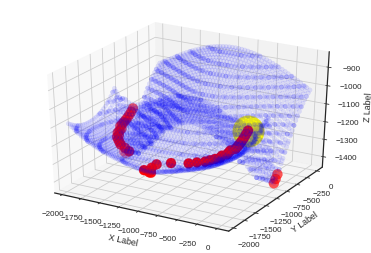

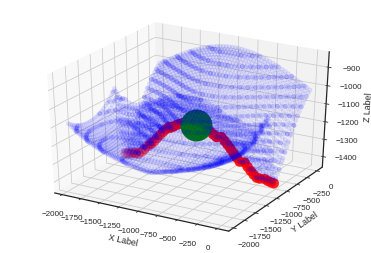

Down to spill.


/home/bl9/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:143: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


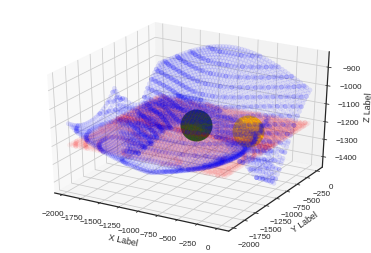

Bottom_Z: -1116.10862732
Maximum reservoir volume: 15744000.0 m³


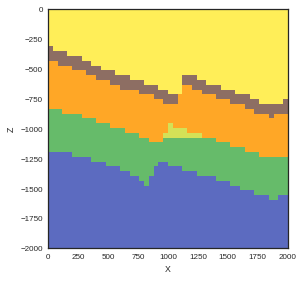

In [123]:
  
@pymc.deterministic
def gempy_model(value=0, z_res_top = z_res_top):

    new_z = res_z + z_res_top
    print('variation:', z_res_top)
    #print('new', new_z)
    #print(res_z)
    interp_data.geo_data_res.interfaces['Z'][interp_data.geo_data_res.interfaces['formation'] == 'Reservoir'] = new_z
    #print(interp_data.geo_data_res.interfaces['Z'][interp_data.geo_data_res.interfaces['formation'] == 'Reservoir'])
    
    sol, pot = gp.compute_model(interp_data, get_potential_at_interfaces=True)
    #gp.plot_section(geo_data, sol[0,:], 25)
    
    res_surf, what_surf = gp.get_surfaces(potential_block=sol[1,:], 
                                          interp_data = interp_data, n_formation = (interp_data.get_formation_number()['Reservoir']),)
    
    #print(sol[1,:])
    lith_block = sol[0,:]
    fault_block = sol[2,:]
    
    spill_z, spill_p, spill_line, spill_bottom = spill_point(res_surf)
    leak_z, leak_p, leak_line, leak_bottom = leak_point(res_surf)
    
    print('Spill_Z:', spill_z)
    print('Leak_Z:', leak_z)
    
    plot_spill(res_surf, spill_line, spill_p)
    plot_leak(res_surf, leak_line, leak_p)
            
    max_vol, sol[0,:], bottom = max_res_vol(lith_block, fault_block, res_surf)
    
    plot_trap(res_surf, bottom, spill_p, leak_p)
    print("Bottom_Z:", bottom[1,2])
    
    print("Maximum reservoir volume: %s m³" % max_vol)
    gp.plot_section(geo_data, sol[0,:], 25)
    return sol

In [124]:
iterations = 5

In [125]:
model = pymc.Model([gempy_model, z_res_top])

variation: -0.014808984880906123
[3, 3]


/home/bl9/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Spill_Z: -1334.34692383
Leak_Z: -1369.42592621


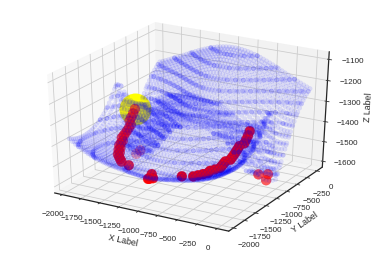

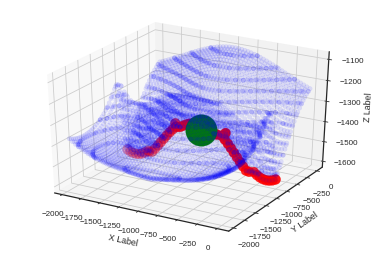

Down to spill.


/home/bl9/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:143: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


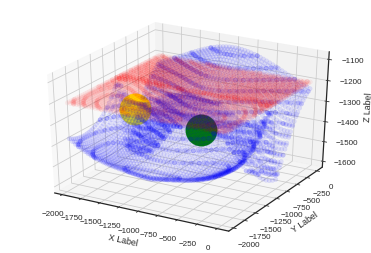

Bottom_Z: -1334.34692383
Maximum reservoir volume: 26368000.0 m³
 [---------------  40%                  ] 2 of 5 complete in 22.2 secvariation: 0.015001013659545086
[3, 3]
Spill_Z: -1216.16699219
Leak_Z: -1260.49507141


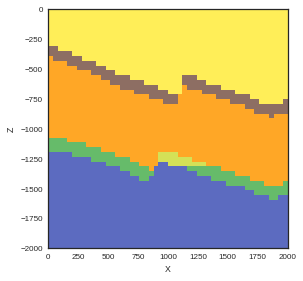

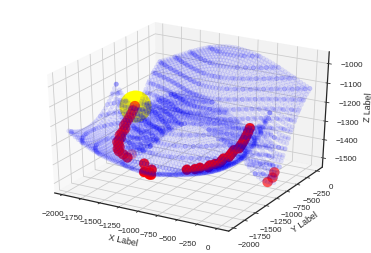

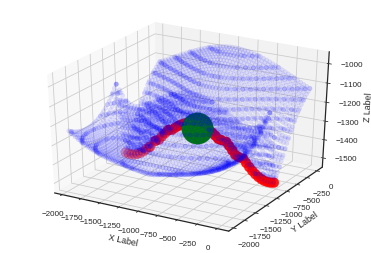

Down to spill.


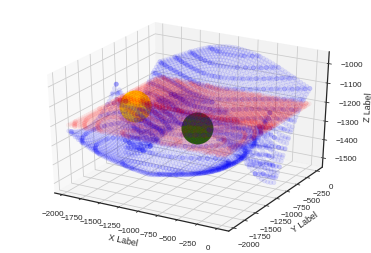

Bottom_Z: -1216.16699219
Maximum reservoir volume: 19968000.0 m³
 [-----------------60%--                ] 3 of 5 complete in 45.2 secvariation: 0.033728743945216515
[3, 3]
Spill_Z: -1157.2567749
Leak_Z: -1192.22511292


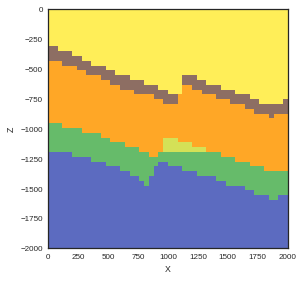

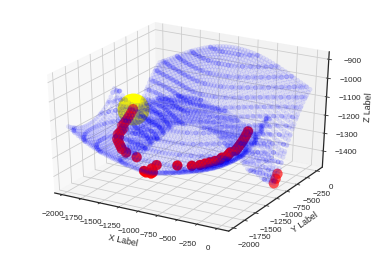

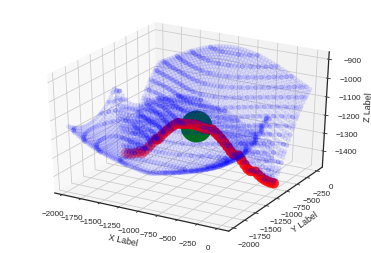

Down to spill.


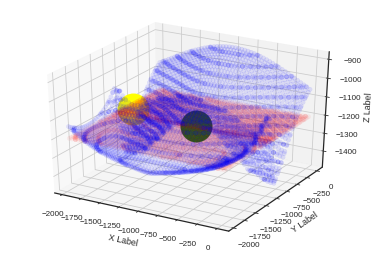

Bottom_Z: -1157.2567749
Maximum reservoir volume: 16896000.0 m³
 [-----------------80%----------        ] 4 of 5 complete in 68.6 secvariation: -0.004812136639273195
[3, 3]
Spill_Z: -1294.99725342
Leak_Z: -1328.7789917


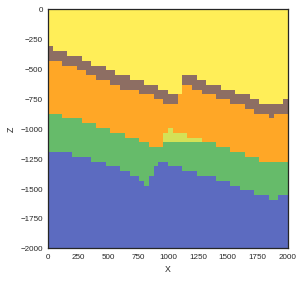

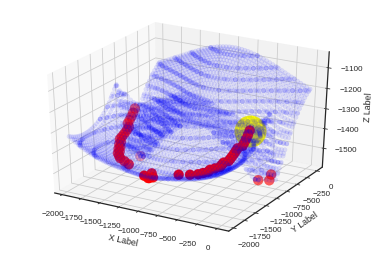

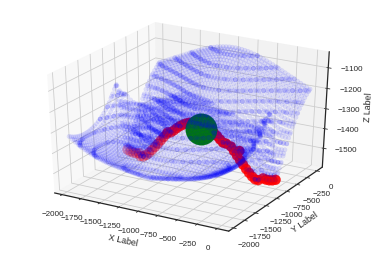

Down to spill.


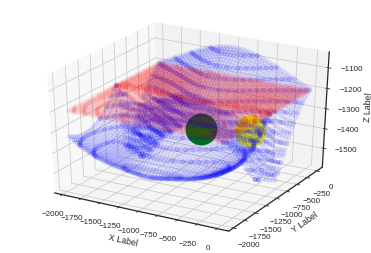

Bottom_Z: -1294.99725342
Maximum reservoir volume: 24960000.0 m³
 [-----------------100%-----------------] 5 of 5 complete in 91.1 secvariation: 0.042771574945129405
[3, 3]
Spill_Z: -1120.32791138
Leak_Z: -1152.90214539


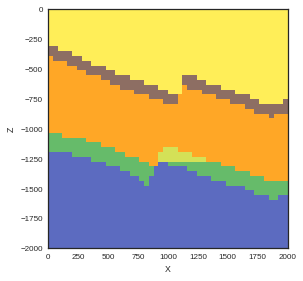

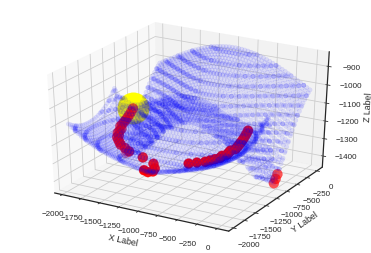

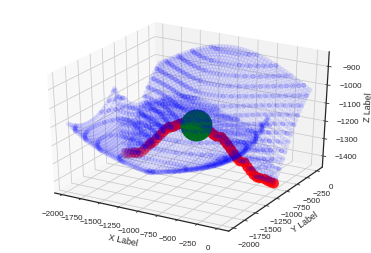

Down to spill.


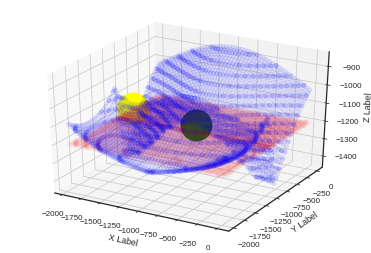

Bottom_Z: -1120.32791138
Maximum reservoir volume: 35584000.0 m³
 [--------------------120%---------------------] 6 of 5 complete in 114.1 sec

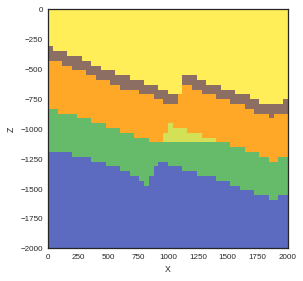

In [126]:
M = pymc.MCMC(model)
M.sample(iter=iterations)

-0.0148089848809
0.0150010136595
0.0337287439452
-0.00481213663927
0.0427715749451


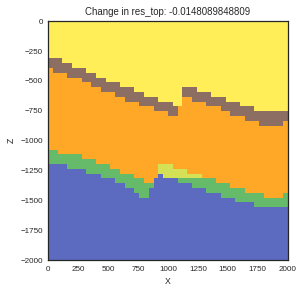

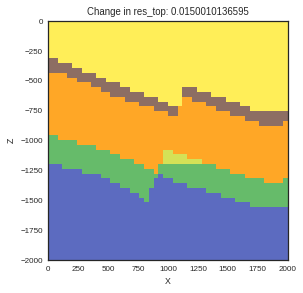

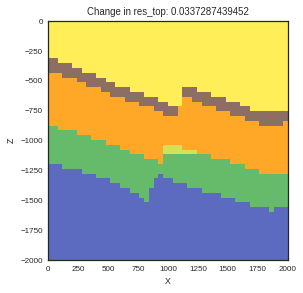

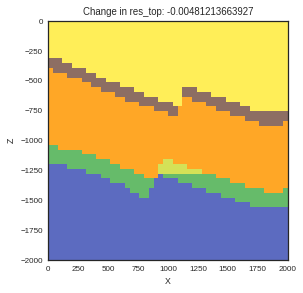

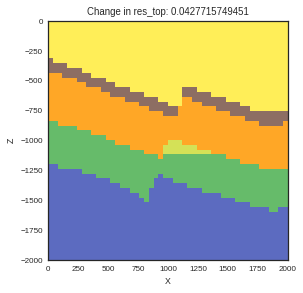

In [134]:
bla = M.trace('z_unc_res')[:]
bli = M.trace('gempy_model')[:]
bla.shape

for j in range(iterations):
    plt.figure()
    plt.title('Change in res_top: %s' % bla[j])
    print(bla[j])
    gp.plot_section(geo_data, bli[j,0], 20)

In [66]:
interp_data.geo_data_res.interfaces

X         Y         Z           formation series  order_series  \
0   0.461638    0.5001    0.5001           MainFault  fault             1   
1   0.410356    0.5001  0.346254           MainFault  fault             1   
2   0.512921    0.5001  0.653946           MainFault  fault             1   
3   0.487279    0.5001  0.577023           MainFault  fault             1   
4   0.435997    0.5001  0.423177           MainFault  fault             1   
5   0.282151    0.5001  0.435997    NonReservoirDeep   Rest             2   
6   0.718049    0.5001  0.352664    NonReservoirDeep   Rest             2   
7   0.538562    0.5001  0.397536    NonReservoirDeep   Rest             2   
8   0.615485    0.5001  0.371895    NonReservoirDeep   Rest             2   
9   0.653946    0.5001  0.359074    NonReservoirDeep   Rest             2   
10  0.461638    0.5001  0.423177    NonReservoirDeep   Rest             2   
11  0.359074    0.5001  0.410356    NonReservoirDeep   Rest             2   
12  0.692408    0.5001  0.346254    NonReservoirDeep   Rest             2   
13  0.410356  0.294972  0.470043           Reservoir   Rest             2   
14  0.410356  0.705228  0.470043           Reservoir   Rest             2   
15  0.359074    0.5001  0.559786           Reservoir   Rest             2   
16  0.282151    0.5001  0.585427           Reservoir   Rest             2   
17  0.718049    0.5001  0.502094           Reservoir   Rest             2   
18  0.692408    0.5001  0.495684           Reservoir   Rest             2   
19  0.538562    0.5001  0.546966           Reservoir   Rest             2   
20  0.615485    0.5001  0.521325           Reservoir   Rest             2   
21  0.653946    0.5001  0.508504           Reservoir   Rest             2   
22  0.461638  0.269331  0.546966           Reservoir   Rest             2   
23  0.461638    0.7501  0.559786           Reservoir   Rest             2   
24  0.461638  0.730869  0.546966           Reservoir   Rest             2   
25    0.5001    0.5001  0.559786           Reservoir   Rest             2   
26  0.461638    0.2501  0.559786           Reservoir   Rest             2   
27  0.435997    0.5001  0.564203                Seal   Rest             2   
28  0.692408    0.5001  0.525741                Seal   Rest             2   
29  0.718049    0.5001  0.532151                Seal   Rest             2   
30  0.359074    0.5001  0.589844                Seal   Rest             2   
31  0.538562    0.5001  0.577023                Seal   Rest             2   
32  0.615485    0.5001  0.551382                Seal   Rest             2   
33  0.718049    0.5001  0.557792  SecondaryReservoir   Rest             2   
34  0.615485    0.5001  0.577023  SecondaryReservoir   Rest             2   
35  0.692408    0.5001  0.551382  SecondaryReservoir   Rest             2   
36  0.435997    0.5001  0.589844  SecondaryReservoir   Rest             2   
37  0.359074    0.5001  0.615485  SecondaryReservoir   Rest             2   
38  0.538562    0.5001  0.602664  SecondaryReservoir   Rest             2   

    formation number  isFault X_std Y_std Z_std dist_type X_dist Y_dist Z_dist  
0                  1     True   NaN   NaN   NaN    Normal   None   None   None  
1                  1     True   NaN   NaN   NaN    Normal   None   None   None  
2                  1     True   NaN   NaN   NaN    Normal   None   None   None  
3                  1     True   NaN   NaN   NaN    Normal   None   None   None  
4                  1     True   NaN   NaN   NaN    Normal   None   None   None  
5                  2    False   NaN   NaN   NaN    Normal   None   None   None  
6                  2    False   NaN   NaN   NaN    Normal   None   None   None  
7                  2    False   NaN   NaN   NaN    Normal   None   None   None  
8                  2    False   NaN   NaN   NaN    Normal   None   None   None  
9                  2    False   NaN   NaN   NaN    Normal   None   None   None  
10                 2    False   NaN   N

Z-Variations: -0.0034294759880120636 

/home/bl9/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/home/bl9/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/home/bl9/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/bl9/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:15: SettingWithCopyWa

-0.008544532459872944 0.004390427082999862 0.11437137525838115
[3, 3]
Spill_Z: -760.0
Leak_Z: -760.0


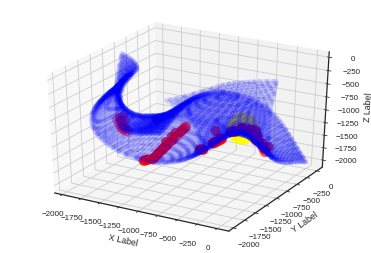

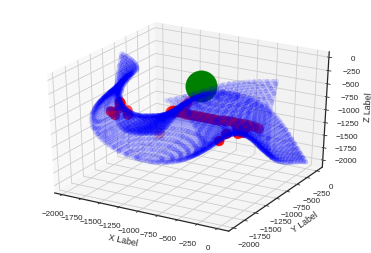

Down to spill.


/home/bl9/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:143: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


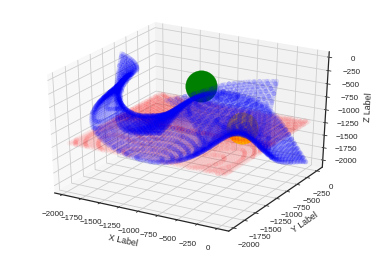

Bottom_Z: -760.0
Maximum reservoir volume: 412800000.0 m³


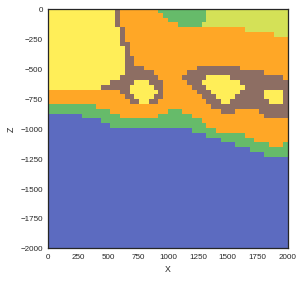

In [139]:
  
@pymc.deterministic
def model_unc_all(value=0, z_sec_res_top = z_sec_res_top, 
                  z_res_top = z_res_top, z_seal_top = z_seal_top, z_base_top = z_base_top):
    
    new_z_sec_res = sec_res_z + z_sec_res_top
    new_z_seal = seal_z + z_seal_top
    new_z_res = res_z + z_res_top
    new_z_base = base_z + z_base_top
    
    print('Z-Variations:', z_sec_res_top, z_seal_top, z_res_top, z_base_top)
    interp_data.geo_data_res.interfaces['Z'][interp_data.geo_data_res.interfaces['formation'] == 'SecondaryReservoir'] = new_z_sec_res
    interp_data.geo_data_res.interfaces['Z'][interp_data.geo_data_res.interfaces['formation'] == 'Seal'] = new_z_seal
    interp_data.geo_data_res.interfaces['Z'][interp_data.geo_data_res.interfaces['formation'] == 'Reservoir'] = new_z_res
    interp_data.geo_data_res.interfaces['Z'][interp_data.geo_data_res.interfaces['formation'] == 'NonReservoirDeep'] = new_z_base
   
    sol, pot = gp.compute_model(interp_data, get_potential_at_interfaces=True)
    
    res_surf, what_surf = gp.get_surfaces(potential_block=sol[1,:], 
                                          interp_data = interp_data, n_formation = (interp_data.get_formation_number()['Reservoir']),)
    
    #print(sol[1,:])
    lith_block = sol[0,:]
    fault_block = sol[2,:]
    
    spill_z, spill_p, spill_line, spill_bottom = spill_point(res_surf)
    leak_z, leak_p, leak_line, leak_bottom = leak_point(res_surf)
    
    print('Spill_Z:', spill_z)
    print('Leak_Z:', leak_z)
    
    plot_spill(res_surf, spill_line, spill_p)
    plot_leak(res_surf, leak_line, leak_p)
            
    max_vol, sol[0,:], bottom = max_res_vol(lith_block, fault_block, res_surf)
    
    plot_trap(res_surf, bottom, spill_p, leak_p)
    print("Bottom_Z:", bottom[1,2])
    
    print("Maximum reservoir volume: %s m³" % max_vol)
    gp.plot_section(geo_data, sol[0,:], 25)
    return sol

In [141]:
model2 = pymc.Model([model_unc_all, z_sec_res_top, z_seal_top, z_res_top, z_base_top])

Z-Variations: 0.016441338156186876 -0.008215534612955148 0.0032364998376947633 -0.15365934745957702


/home/bl9/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/home/bl9/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/home/bl9/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/bl9/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:15: SettingWithCopyWa

[3, 3]
Spill_Z: -1102.14561462
Leak_Z: -1119.87632751


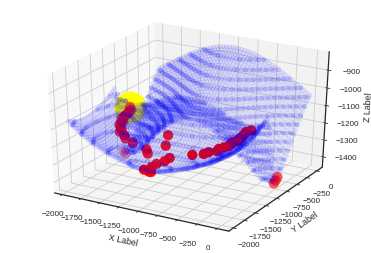

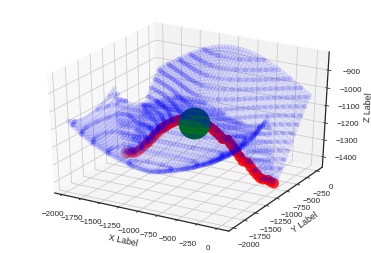

Down to spill.


/home/bl9/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:143: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


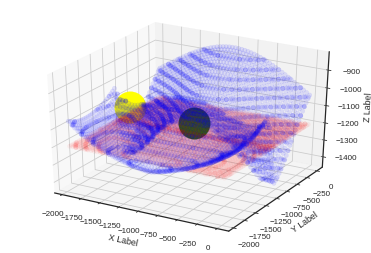

Bottom_Z: -1102.14561462
Maximum reservoir volume: 22784000.0 m³
 [---------------  40%                  ] 2 of 5 complete in 27.9 secZ-Variations: 0.0015772834724400028 -0.015187509610839575 0.025351694719660964 0.1092733493130258
[3, 3]


/home/bl9/anaconda3/lib/python3.5/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.306799890521404e-09
  ' condition number: {}'.format(rcond), RuntimeWarning)


Spill_Z: -923.08052063
Leak_Z: -800.0


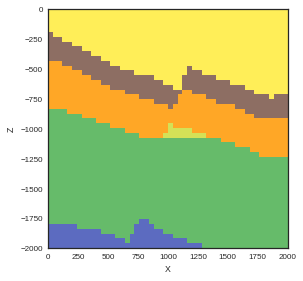

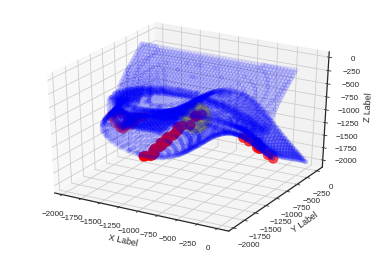

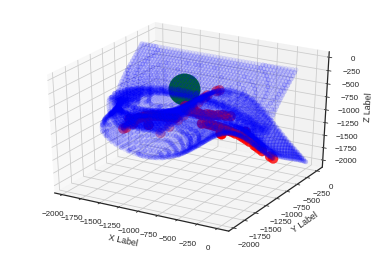

Down to leak.


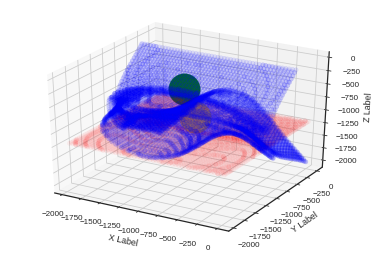

Bottom_Z: -800.0
Maximum reservoir volume: 20224000.0 m³
 [-----------------60%--                ] 3 of 5 complete in 69.8 secZ-Variations: -0.011625456438217172 0.0046872385415156915 -0.06426717019463335 0.18679856568108666
[3, 3]


/home/bl9/anaconda3/lib/python3.5/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 2.01309724445764e-09
  ' condition number: {}'.format(rcond), RuntimeWarning)


Spill_Z: -1359.41352844
Leak_Z: -1304.57824707


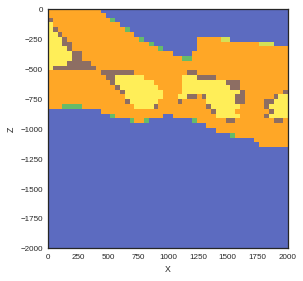

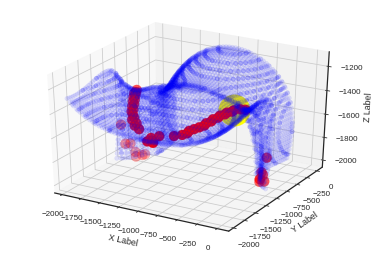

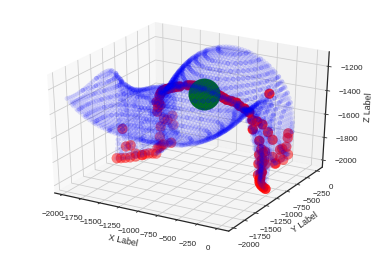

Down to leak.


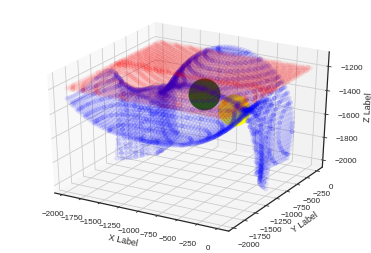

Bottom_Z: -1304.57824707
Maximum reservoir volume: 2078144000.0 m³
 [-----------------80%----------        ] 4 of 5 complete in 96.2 secZ-Variations: 0.0010673906695452813 0.012685044539455079 0.03004772826254262 0.12164909946433329
[3, 3]


/home/bl9/anaconda3/lib/python3.5/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 4.6034216438783915e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


Spill_Z: -760.0
Leak_Z: -480.0


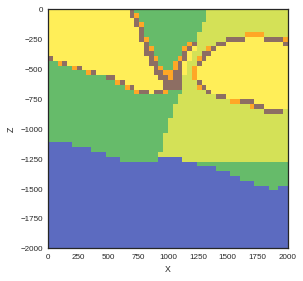

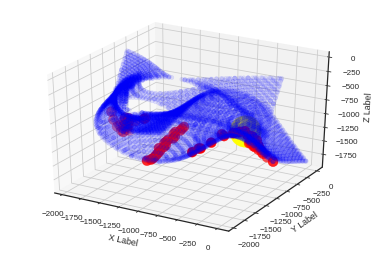

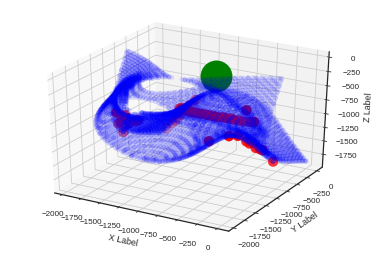

Down to leak.


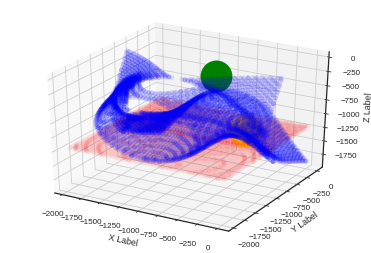

Bottom_Z: -480.0
Maximum reservoir volume: 71552000.0 m³
 [-----------------100%-----------------] 5 of 5 complete in 132.5 secZ-Variations: -0.017993569615383974 0.02203971570487624 0.004260852153893983 -0.00064037663992708
[3, 3]
Spill_Z: -1103.10592651
Leak_Z: -1120.0


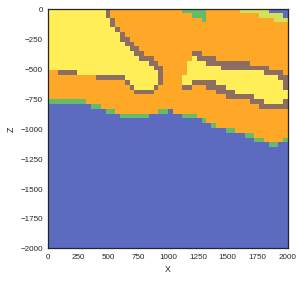

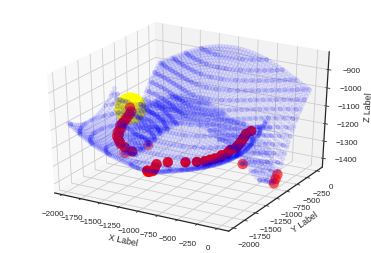

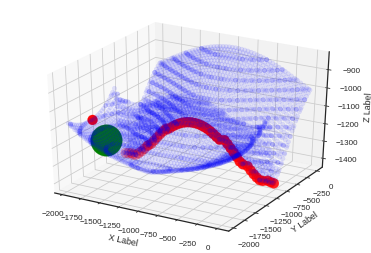

Down to spill.


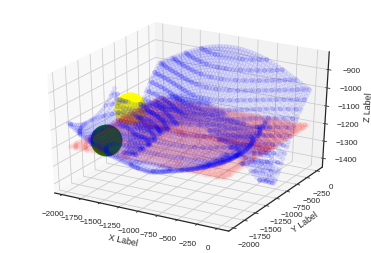

Bottom_Z: -1103.10592651
Maximum reservoir volume: 20992000.0 m³
 [--------------------120%---------------------] 6 of 5 complete in 159.6 sec

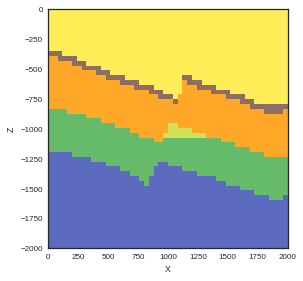

In [142]:
M2 = pymc.MCMC(model2)
M2.sample(iter=iterations)

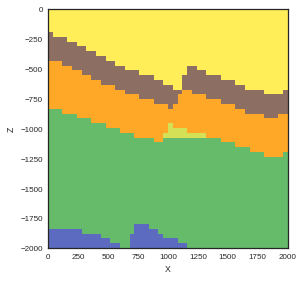

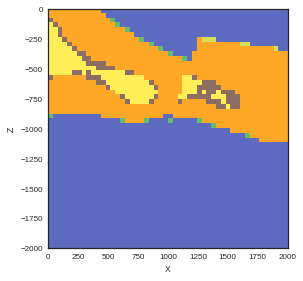

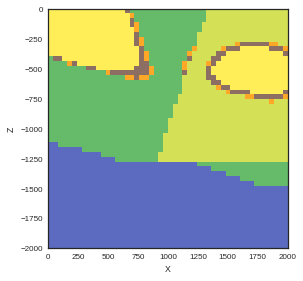

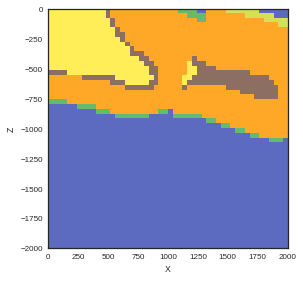

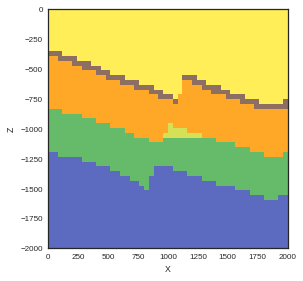

In [145]:
sec_res_unc_trace = M2.trace('z_unc_sec_res')[:]
seal_unc_trace = M2.trace('z_unc_seal')[:]
res_unc_trace = M2.trace('z_unc_res')[:]
base_base_trace = M2.trace('z_unc_base')[:]
model2_trace = M2.trace('model_unc_all')[:]

for j in range(iterations):
    plt.figure()
    #plt.title('Change in res_top: %s' % bla[j])
    #print(bla[j])
    gp.plot_section(geo_data, model2_trace[j,0], 20)